In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('Downloads/D1(1).csv')

df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted
0,150645834,66173058,Caucasian,Female,[60-70),?,2,1,1,4,...,No,No,No,No,No,No,Steady,No,Yes,>30
1,150646782,104923647,Caucasian,Female,[80-90),?,3,2,1,8,...,No,No,No,Steady,No,No,Down,Ch,Yes,>30
2,150659562,30917367,Caucasian,Female,[80-90),?,2,1,1,2,...,No,No,No,No,No,No,No,No,No,NO
3,150660432,103542327,Caucasian,Female,[60-70),?,3,1,1,2,...,No,No,No,No,No,No,No,No,No,NO
4,150663240,41703363,Caucasian,Female,[60-70),?,3,2,1,7,...,No,No,No,No,No,No,Down,Ch,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,No,No,No,No,No,Down,Ch,Yes,>30
51762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,No,No,No,No,No,Steady,No,Yes,NO
51763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,No,No,No,No,No,Down,Ch,Yes,NO
51764,443857166,31693671,Caucasian,Unknown/Invalid,[80-90),?,2,3,7,10,...,No,No,No,Steady,No,No,Up,Ch,Yes,NO


In [218]:
df['readmitted'].value_counts()

NO     27938
>30    18214
<30     5614
Name: readmitted, dtype: int64

In [219]:
# change readmitted into numerical 0/1/2 variable
readmitted_map = {'NO':0, '<30':1, '>30':2}
df['readmitted'] = df['readmitted'].map(readmitted_map)

In [220]:
# showing that readmitted has been transformed into numerical variable
df['readmitted'].value_counts()

0    27938
2    18214
1     5614
Name: readmitted, dtype: int64

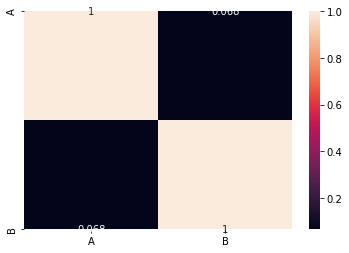

In [221]:
# creating a heatmap to detect if there is any relationship between num_medications and readmitted

A = df['readmitted'] # insert here your list of values for A

B = df['num_medications'] # insert here your list of values for B

df = pd.DataFrame({'A': A,
                   'B': B})

corr = df.corr(method = 'spearman')

sns.heatmap(corr, annot = True)

plt.show()

As shown in the heat map, there is 

In [224]:
df_re0 = df[df['readmitted']== 'NO']
df_re1 = df[df['readmitted']=='<30']
df_re2 = df[df['readmitted']=='>30']

In [225]:
df_re0['num_medications'].describe()

count    27938.000000
mean        16.334562
std          8.309232
min          1.000000
25%         11.000000
50%         15.000000
75%         21.000000
max         75.000000
Name: num_medications, dtype: float64

In [226]:
df_re1['num_medications'].describe()

count    5614.000000
mean       17.493944
std         8.016299
min         1.000000
25%        12.000000
50%        16.000000
75%        22.000000
max        72.000000
Name: num_medications, dtype: float64

In [227]:
df_re2['num_medications'].describe()

count    18214.000000
mean        17.117712
std          7.649883
min          1.000000
25%         12.000000
50%         16.000000
75%         21.000000
max         69.000000
Name: num_medications, dtype: float64

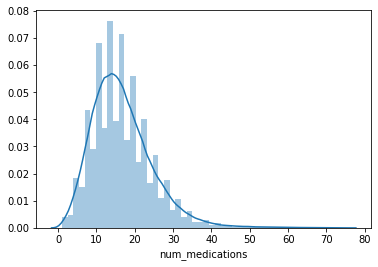

In [228]:
g=sns.distplot(df['num_medications'].dropna())
plt.show()

In [229]:
df['num_medications'].describe()

count    51766.000000
mean        16.735850
std          8.063522
min          1.000000
25%         11.000000
50%         16.000000
75%         21.000000
max         75.000000
Name: num_medications, dtype: float64

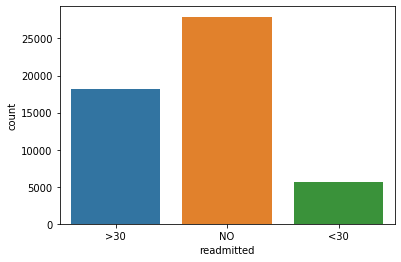

In [230]:
g=sns.countplot(df['readmitted'].dropna())
plt.show()

In [231]:
df['race'].value_counts()

Caucasian          40388
AfricanAmerican     8070
Hispanic            1018
?                   1016
Other                896
Asian                378
Name: race, dtype: int64

In [308]:
#change race into numerical variable
race_map = {'Caucasian':0, 'AfricanAmerican':1, 'Hispanic':2, 'Asian':3, 'Other':4, '?':5}
df['race'] = df['race'].map(race_map)
#change gender into numerical variable
gender_map = {'Female':0, 'Male':1, 'Unknown/Invalid':2}
df['gender'] = df['gender'].map(gender_map)
#change age grounp into numerical variable
age_map = {'[0-10)':0, '[10-20)':1,'[20-30)':2,'[30-40)':3, '[40-50)':4,'[50-60)':5, '[60-70)':6,'[70-80)':7,'[80-90)':8, '[90-100)':9}
df['age'] = df['age'].map(age_map)

In [301]:
df['race'].value_counts()

0    40388
1     8070
2     1018
5     1016
4      896
3      378
Name: race, dtype: int64

In [302]:
df['gender'].value_counts()

Female             27718
Male               24044
Unknown/Invalid        4
Name: gender, dtype: int64

In [305]:
df['gender'].value_counts()

Series([], Name: gender, dtype: int64)

In [279]:
df['age'].value_counts()

[70-80)     12972
[60-70)     11618
[80-90)      9671
[50-60)      8482
[40-50)      4619
[30-40)      1717
[90-100)     1616
[20-30)       815
[10-20)       223
[0-10)         23
?              10
Name: age, dtype: int64

In [309]:
dfnum = df.select_dtypes(include=[np.number])
dfnum

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,150645834,66173058,0,0,6.0,2,1,1,4,43,0,13,1,0,0,9
1,150646782,104923647,0,0,8.0,3,2,1,8,48,6,26,0,0,1,9
2,150659562,30917367,0,0,8.0,2,1,1,2,39,0,9,0,0,0,9
3,150660432,103542327,0,0,6.0,3,1,1,2,54,0,11,0,0,0,3
4,150663240,41703363,0,0,6.0,3,2,1,7,70,1,20,1,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51761,443847548,100162476,1,1,7.0,1,3,7,3,51,0,16,0,0,0,9
51762,443847782,74694222,1,0,8.0,1,4,5,5,33,3,18,0,0,1,9
51763,443854148,41088789,0,1,7.0,1,1,7,1,53,0,9,1,0,0,13
51764,443857166,31693671,0,2,8.0,2,3,7,10,45,2,21,0,0,1,9


In [311]:
dfnum = dfnum.iloc[0:51765 , 2:13]

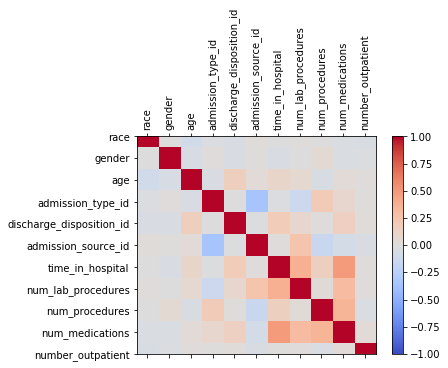

In [312]:
corr = dfnum.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin= -1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dfnum.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation =90)
ax.set_yticks(ticks)
ax.set_xticklabels(dfnum.columns)
ax.set_yticklabels(dfnum.columns)
plt.show()

In [4]:
# detect outlier and skewness of the variable - discharge_disposition_id

df['discharge_disposition_id'].value_counts()

1     30868
3      8105
6      7594
22     1290
2      1149
11      796
7       355
4       329
13      300
14      235
5       232
23      231
28      120
24       44
15       42
18       23
9        18
25       14
8        10
19        7
27        4
Name: discharge_disposition_id, dtype: int64

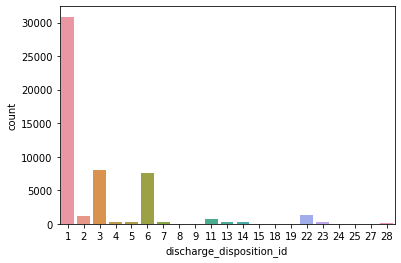

In [6]:
discharge_plot=sns.countplot(data=df, x='discharge_disposition_id')
plt.show()

In [12]:
df['number_emergency'].value_counts()

0     44164
1      5044
2      1398
3       493
4       242
5       147
6        67
7        49
8        34
10       26
9        23
11       20
13       11
12       10
18        5
20        4
19        4
16        4
22        4
14        3
15        3
21        2
64        1
63        1
37        1
29        1
46        1
54        1
24        1
25        1
76        1
Name: number_emergency, dtype: int64

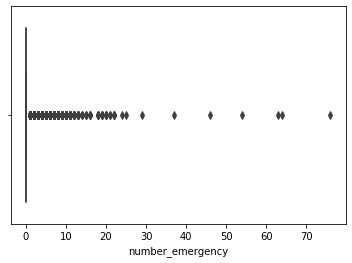

In [10]:
numEmergency_plot=sns.boxplot(df['number_emergency'])
plt.show()

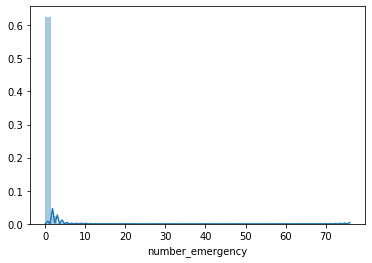

In [11]:
numEmergency_plot2=sns.distplot(df['number_emergency'])
plt.show()

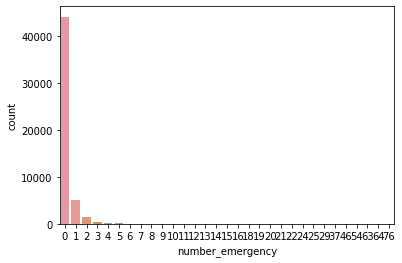

In [13]:
numEmergency_plot3=sns.countplot(data=df, x='number_emergency')
plt.show()